## 파이썬에서 선형회귀(Linear regression)를 이용한 게 나이 예측하기
---
통계 또는 기계학습을 배우다 보면, 선형 회귀(Linear regression)라는 말을 흔히 들어볼 수 있습니다. 선형 회귀는 통계학 분야에서 예측을 할 때 쉽게 떠올릴 수 있는 모델인데요, 빠른 이해를 위해서 사용 예시를 설명해 드리자면 다음과 같은 사례를 생각해볼 수 있습니다.  
</p></br></br>


1. 도시의 인구수와 집값의 관계를 이용해서, 향후 인구가 X명 늘어났을 때 집값이 얼마나 오르거나 내릴지 예측을 해 보자!
1. 특정 기간의 영화 평점은 실제로 해당 기간 영화의 매출이랑 관계가 있을까?
1. A 회사의 주가에 영향을 주는 요인 중 금리, 매출, 점유율 중 어떤 요인이 가장 인과성이 높을까? 등이 있겠죠.  
</p></br></br>


선형 회귀는 독립 변수 X와 종속 변수 y가 있을 때, X와 y의 선형 방정식으로 나타내는 회귀분석 기법입니다. 이를 이용하면 예측 또는 두 변수 사이의 관계 검증을 할 수 있습니다. 만약 선형 회귀 분석을 해볼 예정이라면, 우선 데이터가 선형성(linearity)을 보여야 한다는 가정이 필요합니다. 아주 단순하게 설명하자면, 일차함수와 비슷한 경향을 띠면 된다는 말이지요(실제로는 일차함수보다 조금 더 확장된 개념입니다). 그리고 데이터가 등분산성(homoskedasticity)을 보여야 한다는 제약, 오차의 독립성, 다중공선성의 부재 등의 가정이 필요합니다.  
</p></br></br>


이번에는 파이썬(Python)의 기계학습 패키지인 사이킷런(scikit-learn)의 `LinearRegression` 기능을 사용해서 선형회귀를 구현해 보도록 하겠습니다. 여기에 사용할 데이터는 Crab Age Prediction 데이터인데요, 이름 그대로 게의 다양한 정보를 이용해서 나이를 추정할 수 있게끔 만들어둔 데이터입니다. 이 데이터를 이용해서, 게의 길이(Length)를 이용해서 나이(Age)를 예측하는 모델을 만들어 보겠습니다.  
</p></br></br>



In [1]:
# 패키지 및 데이터 불러오기
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
reg = LinearRegression()

crab = pd.read_csv('./data/CrabAgePrediction.csv')

In [2]:
crab.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


<AxesSubplot: xlabel='Length', ylabel='Age'>

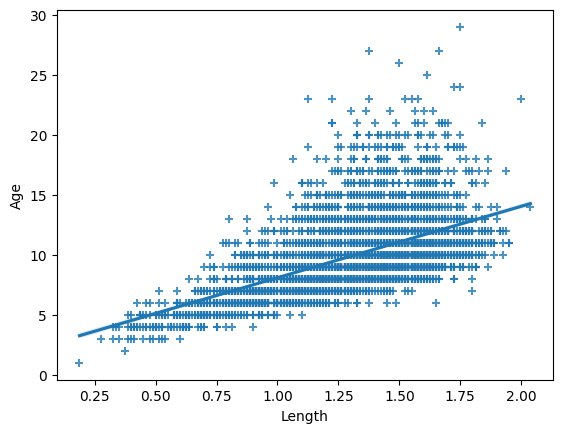

In [3]:
sns.regplot(data=crab, x='Length', y='Age', marker='+')

</p></br></br>


Crab Age Prediction 데이터는 깔끔하게 잘 정리되어 있고, Length와 Age가 양의 상관관계를 보이는 것으로 추정되는 데이터셋입니다. 여기서는 특별한 전처리는 거치지 않고 그대로 모델에 집어넣어보는 작업만 해둘 예정입니다. 사이킷런은 대부분의 기능이 X, Y 데이터를 넣으고, `fit()` 함수와 `predict()` 함수 정도만 입력하면 간편하게 예측 기능을 이용할 수 있기 때문에 이번 기회에 하나 외워두시면 모델별로 예측 기능은 마스터했다고 생각해 두시면 되겠습니다.  
</p></br></br>



In [4]:
reg.fit(crab['Length'].values.reshape(-1, 1), crab['Age'])

LinearRegression()

In [5]:
reg.predict([[3]])

array([20.00245614])

</p></br></br>


이번에는 기존 데이터에는 없는 몸 길이 3피트짜리 게의 경우, 나이를 어느정도로 추정할 수 있는지 예측해 봤습니다. 주어진 데이터를 이용한 예측 결과, 3피트짜리 게는 약 20살 정도로 추정된다고 하네요. 이렇게 어떤 데이터가 주어졌을 때, 기존 데이터를 토대로 미지의 영역에 있는 데이터를 추정할 수 있는 기능이 선형회귀의 주 사용처 중 하나입니다. 물론 최근에는 다른 딥러닝 모델을 이용해 정교한 예측을 하는 추세이지만, 단순히 선형적인 관계를 보이는 데이터일 때는 이정도로만 해도 꽤나 정확한 추정을 할 수 있지요.  